In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Get the list of columns
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [4]:
# Display the first few rows
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [5]:
# Generate descriptive statistics
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
defaulters = df[df['loan_status'] == 'Charged Off']
print(defaulters)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500           2500.0   
8      1071795    1306957       5600         5600           5600.0   
9      1071570    1306721       5375         5375           5350.0   
12     1064687    1298717       9000         9000           9000.0   
14     1069057    1303503      10000        10000          10000.0   
...        ...        ...        ...          ...              ...   
39667   118823     118026       2500         2500            675.0   
39668   118533     117783       2500         2500            825.0   
39669   118523     118519       6500         6500            225.0   
39678   113179     113093       1000         1000            950.0   
39688   111227     111223      20000        20000           2800.0   

             term int_rate  installment grade sub_grade  ...  \
1       60 months   15.27%        59.83     C        C4  ...   
8       60 months   21.28%     

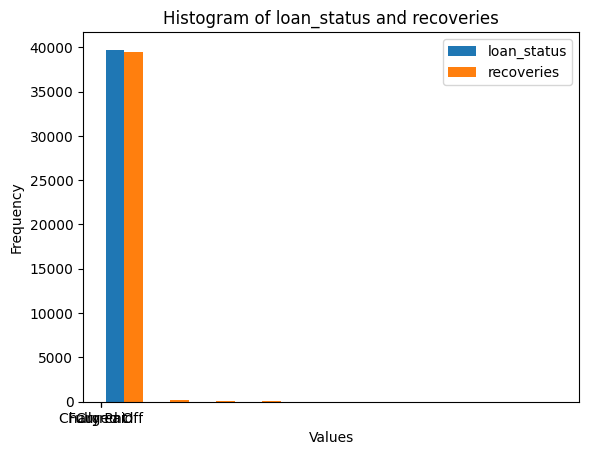

In [8]:
plt.hist([df['loan_status'], df['recoveries']], bins=10, label=['loan_status', 'recoveries'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {} and {}'.format('loan_status', 'recoveries'))
plt.legend()
plt.show()

In [9]:
column = df['pub_rec_bankruptcies']
filtered_values = column[column > 1]
print(filtered_values)

3307     2.0
8140     2.0
14127    2.0
18724    2.0
23127    2.0
23381    2.0
31554    2.0
Name: pub_rec_bankruptcies, dtype: float64


In [10]:
# Drop rows with any NaN values
df_cleaned = df.dropna(axis=1, how='all')
print(df_cleaned)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1    

In [11]:
df_cleaned_zeros_blanks = df_cleaned.loc[:, (df_cleaned != 0).any(axis=0)]

In [12]:
# Remove the rows with all zeros
print(df_cleaned_zeros_blanks)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...       Jan-15   
1    

In [13]:
import numpy as np
# Replace 0.0 with NaN
df_cleaned_zeros_blanks.replace(0.0, np.nan, inplace=True)

/var/folders/pd/d_czx5p50yv66byls9q2nmn00000gn/T/ipykernel_43945/2648290098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_zeros_blanks.replace(0.0, np.nan, inplace=True)


In [14]:
print(df_cleaned_zeros_blanks)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...       Jan-15   
1    

In [15]:
df_cleaned_zeros_blanks=df_cleaned_zeros_blanks.dropna(axis=1, how='all')
print(df_cleaned_zeros_blanks)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

In [16]:
# Get the list of columns
print(df_cleaned_zeros_blanks.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type', 'pub_rec_bankruptcies']


In [25]:
# Define filter conditions
filter1 = df_cleaned_zeros_blanks['loan_status'] == 'Charged Off'
filter2 = df_cleaned_zeros_blanks['pub_rec_bankruptcies'] > 0
filter3 = df_cleaned_zeros_blanks['delinq_2yrs'] > 0
filter4 = (df_cleaned_zeros_blanks['home_ownership'] == 'MORTGAGE') | (df_cleaned_zeros_blanks['home_ownership'] == 'RENT')
# Filter rows where last payment date is greater than loan end date
filter5 = df_cleaned_zeros_blanks['revol_bal'] > df_cleaned_zeros_blanks['funded_amnt_inv']

In [26]:
# Combine conditions using logical AND (&)
filtered_loan1 = df_cleaned_zeros_blanks[filter1 & filter2 & filter3 & filter4 & filter5]

In [27]:
print(filtered_loan1# Define a function to convert subgrades to a comparable value
def subgrade_to_value(subgrade):
    grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    if subgrade[0] in grade_mapping:
        return grade_mapping[subgrade[0]] * 10 + int(subgrade[1])
    else:
        return float('inf')  # Handle unexpected subgrades)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
3156   1024480    1253604       6000         6000       6000.00000   
7112    879707    1094682       5000         5000       5000.00000   
8710    861878    1074798      10000        10000      10000.00000   
11434   814629    1022159       2000         2000       2000.00000   
13575   778955     981610       8000         8000       7975.00000   
14545   764124     964804       6725         6725       6725.00000   
18063   668955     855354       6800         6800       4442.05000   
18253   701561     893320       5000         5000       5000.00000   
23042   619857     794465       2800         2800       2800.00000   
27846   547215     705600       8000         8000       8000.00000   
30294   510578     659283      14000        14000      12735.52665   
35840   429126     508289      16750        16750      12973.50803   

             term int_rate  installment grade sub_grade  ...  \
3156    36 months   10.65

In [28]:
# Define a function to convert subgrades to a comparable value
def subgrade_to_value(subgrade):
    grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    if subgrade[0] in grade_mapping:
        return grade_mapping[subgrade[0]] * 10 + int(subgrade[1])
    else:
        return float('inf')  # Handle unexpected subgrades

In [29]:
# Apply the function to create a new column for comparison
filtered_loan1['subgrade_value'] = filtered_loan1['sub_grade'].apply(subgrade_to_value)

/var/folders/pd/d_czx5p50yv66byls9q2nmn00000gn/T/ipykernel_43945/2928189424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan1['subgrade_value'] = filtered_loan1['sub_grade'].apply(subgrade_to_value)


In [30]:
# Define the value for D1 (using the same conversion function)
threshold_value = subgrade_to_value('D1')

In [32]:
# Filter rows where the subgrade is greater than D1
filtered_df = filtered_loan1[filtered_loan1['subgrade_value'] > threshold_value]

In [33]:
# Display the filtered DataFrame
print(filtered_df)

           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
13575  778955     981610       8000         8000       7975.00000   60 months   
14545  764124     964804       6725         6725       6725.00000   60 months   
18063  668955     855354       6800         6800       4442.05000   60 months   
27846  547215     705600       8000         8000       8000.00000   36 months   
30294  510578     659283      14000        14000      12735.52665   36 months   
35840  429126     508289      16750        16750      12973.50803   36 months   

      int_rate  installment grade sub_grade  ... recoveries  \
13575   18.39%       204.85     E        E2  ...     352.33   
14545   17.99%       170.74     E        E1  ...      25.28   
18063   16.77%       168.16     E        E2  ...        NaN   
27846   15.58%       279.61     D        D3  ...     307.42   
30294   16.82%       497.87     E        E2  ...     473.32   
35840   20.11%       623.40     G        G5  ...     8

In [35]:
# Remove the '%' symbol and convert the column to a numeric type
filtered_df['revol_util'] = filtered_df['revol_util'].str.replace('%', '').astype(float)

/var/folders/pd/d_czx5p50yv66byls9q2nmn00000gn/T/ipykernel_43945/956546456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['revol_util'] = filtered_df['revol_util'].str.replace('%', '').astype(float)


In [36]:
# Filter the rows where revol_util is greater than 50%
filtered_df = filtered_df[filtered_df['revol_util'] > 50]

# Display the filtered DataFrame
print(filtered_df)

           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
14545  764124     964804       6725         6725       6725.00000   60 months   
18063  668955     855354       6800         6800       4442.05000   60 months   
27846  547215     705600       8000         8000       8000.00000   36 months   
30294  510578     659283      14000        14000      12735.52665   36 months   
35840  429126     508289      16750        16750      12973.50803   36 months   

      int_rate  installment grade sub_grade  ... recoveries  \
14545   17.99%       170.74     E        E1  ...      25.28   
18063   16.77%       168.16     E        E2  ...        NaN   
27846   15.58%       279.61     D        D3  ...     307.42   
30294   16.82%       497.87     E        E2  ...     473.32   
35840   20.11%       623.40     G        G5  ...     891.87   

      collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
14545                  4.5504       Mar-15           170.7

In [37]:
# Save the filtered DataFrame back to a CSV file
filtered_df.to_csv('filtered_data.csv', index=False)